<a href="https://colab.research.google.com/github/vladfarias/TesteDeHipotese/blob/main/TesteHipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TESTE DE HIPOTESE UNILATERAL A DIREITA COM DESVIO CONHECIDO**

Inspeção  do peso médio de um lote com 10000 ovos. Desvio padrão da população é 2.2 gramas. Decidi-se compar o lote caso o peso médio seja maior que 10 gramas.

Uma amostra de 50 ovos inpsecionada e o peso médio é de 11,2 gramas. Há evidência para aceitar o lote considerando o nivel de significancia de 5% ?

Xm = 11,2 e desvio padrão da população é 2,2

Hipótese Nula (H0): O peso médio do lote é igual a 10 gramas.
Hipótese Alternativa (H1): O peso médio do lote é maior que 10 gramas



In [ ]:
import scipy.stats as stats

In [ ]:
mu = 10  # Peso médio esperado
x_bar = 11.2  # Média da amostra
sigma = 2.2  # Desvio padrão da população
n = 50  # Tamanho da amostra
alpha = 0.05  # Nível de significância

stats.norm.ppf() e stats.norm.cdf() são funções da biblioteca scipy.stats que estão relacionadas à distribuição normal (ou distribuição normal padrão). Essas funções são usadas para calcular valores críticos e probabilidades cumulativas da distribuição normal.

**stats.norm.ppf(q, loc=0, scale=1):**
"Qual é o valor abaixo do qual uma certa porcentagem dos dados está?"

A função ppf() (Percent Point Function) calcula o quantil (valor crítico) associado a um determinado quantil q da distribuição normal.
O parâmetro q é a probabilidade cumulativa que você deseja calcular o quantil para.
loc é o parâmetro de média da distribuição (padrão é 0).
scale é o parâmetro de desvio padrão da distribuição (padrão é 1)

Para q entre 0 e 1, o resultado é o valor abaixo do qual a porcentagem q dos dados está. Por exemplo, stats.norm.ppf(0.25) retornaria o primeiro quartil (25º percentil).

stats.norm.ppf() calcula o valor crítico associado a uma probabilidade cumulativa (quantil).
stats.norm.cdf() calcula a probabilidade cumulativa de que um valor seja menor ou igual a um determinado po

In [ ]:
# 1 Calculo do z critico (pois o desvio da população é conhecido)
z_critico = stats.norm.ppf(1 - alpha)
z_critico

1.6448536269514722

In [ ]:
# Calculo do estrela
z_estrela = (x_bar - mu) / (sigma / (n ** 0.5))

A função **stats.norm.cdf()** é usada para calcular a probabilidade cumulativa de que um valor aleatório de uma distribuição normal (ou distribuição normal padrão) seja menor ou igual a um determinado valor. Em outras palavras, ela ajuda a responder à pergunta: "Qual é a probabilidade de um valor estar abaixo de um certo ponto?"

x (é o z): É o valor para o qual você deseja calcular a probabilidade cumulativa.
loc: É o parâmetro de média da distribuição normal (padrão é 0).
scale: É o parâmetro de desvio padrão da distribuição normal (padrão é 1).

stats.norm.cdf() é usada para calcular a probabilidade cumulativa de um valor estar abaixo ou igual a um ponto específico na distribuição normal. Isso é útil para calcular a área sob a curva de uma distribuição normal, definir intervalos de confiança, calcular valores p em testes de hipóteses e muito mais. Para obter o valor P é passado como argumento o z_estrela, se for passado o z critico sera retornado 1-alpha.

In [ ]:
# Rejeita a hipotese
H0 = 'Aceita H0: Peso médio dos ovos é 10' if z_critico > z_estrela else 'Rejeita H0: Peso médio dos ovos é maior que 10'
H0

'Rejeita H0: Peso médio dos ovos é maior que 10'

**Resolvendo a mesma questão acima usando o P values**

In [ ]:
mu = 10  # Peso médio esperado
x_bar = 11.2  # Média da amostra
sigma = 2.2  # Desvio padrão da população
n = 50  # Tamanho da amostra
alpha = 0.05  # Nível de significânc

In [ ]:
# Calculo do z_estrela
z_estrela = (x_bar - mu) / (sigma / (n ** 0.5))
z_estrela

3.8569460791993477

In [ ]:
# Calcula o valor p (unilateral à direita)
p_value = 1- stats.norm.cdf(z_estrela)
p_value

5.7406238207491356e-05

In [ ]:
# Rejeitamos a hipotese nula ?
H0 = 'Aceitamos H0' if p_value > alpha else 'Rejeitamos H0'
H0


'Rejeitamos H0'

**TESTE DE HIPOTESE UNILATERAL A ESQUERDA COM DESVIO CONHECIDO**

Em um produção de garrafas de agua se afirma que as garrafas possuem v = 300 ml com desvio de 5,6 mL. Clientes reclamaram que as garrafas possuem um volume menor que o informado. Retiraram 20 amostras e o volume medido foi como informado:

Hipótese Nula (H0): Volume é igual a 300 mL.

Hipótese Alternativa (H1): Volume menor que 300 mL

In [ ]:
import scipy.stats as stats
import pandas as pd


In [ ]:
volumes = [294, 287, 292, 300, 301, 286, 286, 288, 304, 301, 296, 299, 288, 303, 302, 290, 288, 300, 292, 300]
mu = 300
sigma = 5.6
alpha_vol = 0.1
n = len(volumes)
n

20

In [ ]:
# Média
x_bar = sum(volumes) / n
x_bar

294.85

In [ ]:
z_estrela_vol = (x_bar - mu) / (sigma / (n ** 0.5))
z_estrela_vol

-4.112767887187096

Método do Zcritico

In [ ]:
zc = stats.norm.ppf(alpha_vol)
zc

-1.2815515655446004

In [ ]:
h0 = 'Aceitamos h0' if z_estrela_vol > zc  else 'Rejeitamos h0'
h0

'Rejeitamos h0'

Método do valor P

In [ ]:
# Calculo do P value
p_value_vol = stats.norm.cdf(alpha_vol)
p_value

5.7406238207491356e-05

In [ ]:
# Rejeitamos H0 ?
h0 = 'Aceitamos h0' if p_value > alpha_vol else 'Rejeitamos h0'
h0

'Rejeitamos h0'

**TESTE DE HIPOTESE BILATERAL COM DESVIO CONHECIDO**

Preço médio de apartamentos na região central da cidade em 2017 foi 242000.00 com desvio de 25000.00. Em 2018 uma amostra de 150 apartamentos e encontrou o preço médio de 240000.00. Com um nivel de significancia de 1% determine se houve mudança no preço ou não.

In [ ]:
# Dados
x_bar_preco = 240000.00
mi = 242000.00
sigma =  25000
alpha_preco = 0.01
n = 150

In [ ]:
# Calculo do z_estrela
z_estrela_preco = (x_bar_preco - mi)/(sigma/(n**0.5))
z_estrela_preco

-0.9797958971132712

In [ ]:
z = (240000 - 242000)/(25000/(150**0.5))
z

-0.9797958971132712

In [ ]:
# Calculo do Zc
zc_preco_negativo = stats.norm.ppf(alpha_preco/2)
zc_preco_positivo = zc_preco_negativo * (-1)
zc_preco_negativo, zc_preco_positivo

(-2.575829303548901, 2.575829303548901)

In [ ]:
# Rejeitamos H0 ?
h0 = 'Aceitamos h0' if zc_preco_negativo < z_estrela_preco < zc_preco_positivo else 'Rejeitamos h0'
h0

'Aceitamos h0'

**Metodo do p-value**

In [ ]:
# Qual a forma de calcular p está correta ? Vi em videos que a probabilidade é mutiplicada por 2 como a seguir
p_value_preco0 = 2 * (1 - stats.norm.cdf(abs(z_estrela_preco)))
p_value_preco0

0.32718687779030575

In [ ]:
# p_value_preco = min(stats.norm.cdf(z_estrela_preco), 1- stats.norm.cdf(z_estrela_preco))
# p_value_preco

In [ ]:
# Rejeitamos H0 ?
h0 = 'Aceitamos h0' if p_value_preco0 > alpha_preco else 'Rejeitamos h0'
h0

'Aceitamos h0'

**TESTE DE HIPÓTESE QUANDO O DESVIO PADRÃO NÃO E CONHECIDO (DISTRIBUIÇÃO t)**

In [ ]:
import scipy.stats as stats

Exemplo de um teste **unilateral** **a** **DIREITA**

Um fabricante de freios sabe que a vida ultil média dos componentes é 800 horas. Um novo componente foi desenvolvido e informaram que a vida util deste era maior que a do modelo atual. Uma amostra com 50 fo selecionada e encontrada a média de 810h com um desvio padrão amostral de 25 horas. PAra um nivel de significancia de 5%, determine se a afirmação está correta.

h0: média igual a 800 horas

h1: média maior que 800 horas

In [ ]:
x_bar = 810
std = 25
mi = 800
alpha = 0.05
n = 50
# Calcula os graus de liberdade
grau_liberdade = n - 1

In [ ]:
#Calcular o desvipadrão amostral não tendencioso
std = ((n/(grau_liberdade)) ** 0.5) * std
std

25.25381361380527

**Metodo t crítico**

In [ ]:
t_estrela = (x_bar - mi)/((std)/(n**0.5))
t_estrela

2.8

In [ ]:
t_critico = stats.t.ppf(1 - alpha, df=grau_liberdade)
t_critico

1.6765508919142629

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if t_estrela < t_critico else 'Rejeitamos h0'
h0

'Rejeitamos h0'

**Metodo p value**

In [ ]:
t_estrela = (x_bar - mi)/((std)/(n**0.5))
t_estrela

2.8

In [ ]:
p_value = 1- stats.t.cdf(t_estrela, df=grau_liberdade)
p_value

0.003645849336526563

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if p_value > alpha else 'Rejeitamos h0'
h0

'Rejeitamos h0'

Exemplo de um teste **BILATERAL**

Preço médio de apartamentos na região central da cidade em 2017 foi 245000.00 com desvio **ESTIMADO** de 20000.00. Em 2018 uma amostra de 150 apartamentos e encontrou o preço médio de 240000.00. Com um nivel de significancia de 1% determine se houve mudança no preço ou não.

h0: média igual a 245000.00 reais

h1: média diferente de 245000.00 reais

In [ ]:
x_bar = 240000
std = 20000
mi = 245000
alpha = 0.01
n = 150
# Calcula os graus de liberdade
grau_liberdade = n - 1

**Metodo t crítico**

In [ ]:
# Calculo do t_estrela
t = (x_bar - mi)/(std/(n** 0.5))
t

-3.0618621784789726

In [ ]:
# calculo dos t criticos

tc_negativo= stats.t.ppf(alpha/2, df=grau_liberdade)
tc_negativo

-2.609227907332193

In [ ]:
tc_positivo = tc_negativo * (-1)
tc_positivo

2.609227907332193

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if tc_negativo < t < tc_positivo else 'Rejeitamos h0'
h0

'Rejeitamos h0'

**Metodo P VALUE**

In [ ]:
# Calculo do t_estrela
t = (x_bar - mi)/(std/(n** 0.5))
t

-3.0618621784789726

In [ ]:
# Calculo do p-value
p_value = 2 * (1 - stats.t.cdf(abs(t), df=grau_liberdade))
p_value

0.002610366877835446

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if p_value > alpha else 'Rejeitamos h0'
h0

'Rejeitamos h0'

**TESTE DE DIFERENÇA ENTRE AS AMOSTRAS**
1.   AS DIFERENÇAS SÃO SIGNIFICATIVAS ENTRE AS AMOSTRAS?
2.   TESTAR DOIS GRUPOS INDEPENDENTES (CONTROLE E EXPERIMENTAL)




Grupo de 4 atletas treinou um nova técnica diferente para competirem no revesamento 4x100. As listas a seguir mostra os resultados antes e depois da técnica. Determine se há diferença significativas entre tempos usando um teste de hipótese e um nivel de significancia de 1%

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
tempo_a = np.array([ 11.23, 10.98, 10.75, 11.03])
tempo_b = np.array([10.88, 10.78, 10.81, 10.66] )

In [ ]:
tempo_dif = tempo_a -tempo_b
tempo_dif

array([ 0.35,  0.2 , -0.06,  0.37])

In [ ]:
# Calculo da média
media = np.mean(tempo_dif)
media

0.21499999999999986

In [ ]:
# Calculo da desvio padrão (amostral)
std = np.std(tempo_dif, ddof=1)
std

# std_population = np.std(tempo_dif, ddof=0)

0.19841034919244166

h0: média igual a 0 seg

h1: média maior que 0 seg

Usaremos um teste unilateral a direita

In [ ]:
alpha = 0.01
n = 4
grau_liberdade = n -1
std
x_bar = media
mi = 0

In [ ]:
t = (x_bar - mi) /(std/(n**0.5))
t

2.167225660103724

In [ ]:
# Calculo do tc
tc = stats.t.ppf(1-alpha, df=grau_liberdade)
tc

4.540702858698419

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if t < tc else 'Rejeitamos h0'
h0

'Aceitamos h0'

@ Aumentando o alpha (nivel de significancia) aumentamos a chance de  h0 ser rejeitada, pois a área critica aumenta!

Usando o método do p-value

In [ ]:
t = (x_bar - mi) /(std/(n**0.5))

In [ ]:
# Calculo do p-value
value_p = 1- stats.t.cdf(t, df=grau_liberdade)
value_p

0.05938271884852775

In [ ]:
# Rejeitamos h0 ?
h0 = 'Aceitamos h0' if value_p > alpha else 'Rejeitamos h0'
h0

'Aceitamos h0'

**ERRO TIPO I E TIPO II**

Exercício 1:

Um provedor de internet informa que a velocidade de conexão segue uma distribuição normal com sigma de 0.4Mbps. A empresa afirma que seu novo pacote tem velocidades superiores a 8Mbps que é a média historica local. Uma amostra com 6 residências é selecionada e um teste de hipoteses é conduzido com alfa de 1%. Determine a probabilidade do erro tipo II, sabendo que a velocidade média real é 8.6Mbps.

Variavel é a velocidade de conexão
Logo, X ~N(mi,0.4**2)

h0: mi = 8

h1: mi > 8 (unilateral a direita)

Exercício 2:

Uma amostra com 10 objetos é selecionada a partir de uma população com comprimento médio mi desconhecido e desvio padrão 15 cm. O seguinte teste de hipotese é feito:

h0: mi = 30 cm e h1: mi != 30 cm

**TESTE QUI QUADRADO**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare

TESTE QUI QUADRADO DE **INDEPENDENCIA**

100 pessoas foram entrevistadas, perguntadas sua sobremesa favorita. Conduzir um teste qui-quadrado com alfa igual a 5% para determinar se a escolha da sobremesa esta relacionada com o sexo. Os resultados estão nos dicionários a seguir.

In [ ]:
alfa = 0.05

In [ ]:
m = {'sorvete': 19, 'bolo': 6, 'torta Doce': 12, 'Mousse': 8}
f = {'sorvete': 10, 'bolo': 9, 'torta Doce': 23, 'Mousse': 13}

In [ ]:
df = pd.DataFrame({'Sobremesa': list(m.keys()), # ou f.keys()
                   'Homens': list(m.values()),
                   'Mulheres': list(f.values())})

In [ ]:
df

,Sobremesa,Homens,Mulheres
0,sorvete,19,10
1,bolo,6,9
2,torta Doce,12,23
3,Mousse,8,13


H0: sobremesa é independente do sexo

H1: sobremesa não é independente do sexo




Para realizar um teste qui-quadrado de independência no Python, você pode usar a função scipy.stats.chi2_contingency da biblioteca SciPy. Essa função calcula o teste qui-quadrado em uma tabela de contingência, que é exatamente o que está sendo criado com os dicionários m e f.

In [ ]:
# Tabela de contingência
observed = df[['Homens', 'Mulheres']].values
observed

array([[19, 10],
       [ 6,  9],
       [12, 23],
       [ 8, 13]])

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed)

O formato da tabela de contingência que precisa passar para a função chi2_contingency é uma matriz em que as linhas representam as diferentes categorias de uma variável (neste caso, as sobremesas) e as colunas representam os diferentes grupos ou categorias da outra variável (por exemplo, homens e mulheres).

In [ ]:
# Imprimir resultados
print("Qui-Quadrado:", chi2)
print("Valor p:", p)
print("Graus de Liberdade:", dof)
print("Esperados:", expected)

Qui-Quadrado: 7.111840904944351
Valor p: 0.06841717881820417
Graus de Liberdade: 3
Esperados: [[13.05 15.95]
 [ 6.75  8.25]
 [15.75 19.25]
 [ 9.45 11.55]]


In [ ]:
h0 = 'Aceitamos que a Sobremesa é independente do sexo' if p > alfa else 'Rejeitamos que a sobremesa é independente do sexo'
h0

'Aceitamos que a Sobremesa é independente do sexo'

TESTE QUI QUADRADO DE **ADERÊNCIA (GOODNESS OF FIT)**



*   A amostragem deve ser aleatória
*   A variável em estudo deve ser categórica (e não numérica)
*   OS valores observados da variável em cada categoria devem ser, pelo menis iguais a 5 (havendo menores que 5, combina-se 2 ou mais categorias)






Exemplo

Jogo de aposta com o lançamento de 2 dados, sendo o prêmio pago  proporcionalmente ao numero de vez que o numero 6 é obtido. Um apostador lança 60 vezes obtendo os resultados como o dicionário que segue a baixo. Conduza um teste qui-quadrado de aderência com um nível de significancia de 5%, para verificar se os dados utilizados neste jogo são honestos.

In [ ]:
# Frequências observadas
dados_obs = [34, 18, 8]

In [ ]:
# Número total de lançamentos
total_lancamentos = sum(dados_obs) # Informado 60

In [ ]:
# Probabilidade teórica de cada resultado
prob_teorica = [(5/6)**2 * total_lancamentos, 2 * (1/6) * (5/6) * total_lancamentos, (1/6)**2 * total_lancamentos]
prob_teorica

[41.66666666666667, 16.666666666666668, 1.6666666666666665]

 No teste qui-quadrado de aderência, o grau de liberdade (K) é igual a (número de categorias - 1), onde o número de categorias é o número de resultados possíveis menos 1.

Aqui estão os principais parâmetros do método chisquare:

**f_obs**: Este é o parâmetro obrigatório e representa as frequências observadas no seu conjunto de dados. É uma lista ou matriz de números inteiros que representam as contagens reais dos eventos ou categorias que você está analisando.

**f_exp** (opcional): Este é o parâmetro opcional e representa as frequências esperadas sob a hipótese nula. Geralmente, você fornece essa lista ou matriz quando deseja comparar as frequências observadas com as frequências esperadas calculadas a partir de uma distribuição teórica específica. Se este parâmetro não for fornecido, o teste qui-quadrado será realizado para verificar a aderência das frequências observadas a uma distrib

**ddof** (int, opcional): Grau de liberdade. Este parâmetro especifica o número de graus de liberdade do teste. Geralmente, é calculado como o número de categorias menos 1 (K - 1), onde K é o número de categorias nos seus dados.

**axis** (int ou None, opcional): Eixo ao longo do qual as frequências são somadas antes de realizar o teste. Se None, as frequências são achatadas e o teste é aplicado globalmente aos dados.

**nan_policy** ({"propagate", "raise", "omit"}, opcional): Especifica como lidar com valores NaN (Not-a-Number) nos dados. "propagate" permite que NaNs se propaguem pelos cálculos, "raise" gera um erro se houver NaNs e "omit" exclui NaNs dos cálculos.



In [ ]:
# Nível de significância
alfa = 0.05

# Teste qui-quadrado de aderência
chi2, p_valor = chisquare(f_obs=dados_obs, f_exp=prob_teorica, ddof=1)



In [ ]:
resultado = 'Aceita-se h0' if p_valor > alfa else 'Reita-se h0 A situação não segue uam distribuição binomial'

In [ ]:
# Imprimir resultados
print("Estatística Qui-Quadrado:", chi2)
print("P-valor:", p_valor)
print(resultado)

Estatística Qui-Quadrado: 25.584000000000007
P-valor: 4.2353681123389017e-07
Reita-se h0 A situação não segue uam distribuição binomial


**TESTE ANOVA**
Usado para comparar as médias de 3 ou mais amostras e verificar se há diferença estatística entre elas.

Há vários tipos de amostras, aqui verificaremos **Anova 1 fator (one-way)** e **Anova 2 fatores (two-way)**

1 way ANOVA

Se a variância entre os grupos for significativamente maior do que a variância dentro dos grupos, então podemos rejeitar a hipótese nula e concluir que pelo menos um grupo tem uma média populacional diferente. Ex de fatores ou subcategorias diferentes tipos de dieta, ou diferentes tipo de doença ou até grupos raciais. As categorias seriam, dieta, doença e raça.

2 way ANOVA

ANOVA bidirecional é um método estatístico usado para analisar o efeito de duas variáveis independentes em uma variável dependente. Ele testa a hipótese nula de que não há interação entre as duas variáveis independentes e a variável dependente. Isso é feito comparando a variância entre os grupos com a variância dentro dos grupos para cada variável independente, bem como a interação entre as duas variáveis independentes. Se a variância entre os grupos for significativamente maior do que a variância dentro dos grupos para a variável independente ou para a interação, então podemos rejeitar a hipótese nula e concluir que pelo menos uma variável independente tem um efeito significativo na variável dependente. Leva em consideração 2 fatores ou duas categorias de modo que cada uma tem 2 ou mais suncategorias.Ex um estudo pode analisar os efeitos de 3 diferentes tipos de dieta e também as diferenças entre os sexo masculino e feminino.

As hipoteses são:

H0 --> Assume sempre que as médias de cada subcategoria são iguais

H1 --> Indica que pelo menos uma das médias não é igual às outras

O teste estatistico é chamado de teste F (Fcalculado = razão entre a variancia entre amostras e intra-amostras). Assume que exista mesma variabilidade entre as populações correspondentes, ou seja , a variância populacional é a mesma para todas as populações.

**O teste ANOVA é SEMPRE UNILATERAL à Direita!**

Fcalc > Fcritico rejeita-se H0

Exemplo

Estudo para comparar a eficiência de frenagem de carros compactos, carros de médio porte e carros grandes. Conduz-se um teste com 5 amostras para cada veículos para cada umas das subcategorias. Conduza um teste ANOVA 1 Fator para decidir se há diferenças significativas na distancia média de frenagem (em metros) para reduzir a velocidade  de 90km/h. Considere o nível de significancia de 5%

HIPÓTESES

H0: media_compacto = media+medio_porte = media_grande

H1: As distancias médias não são todas iguais

Uma as formas de clacular o F é usando a tabela ANOVA

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
alpha =0.05
campacto = np.array([37, 39, 42, 44, 39])
medio_porte = np.array([45, 46, 49, 39, 45])
grande = np.array([46, 51, 48, 46, 54])


In [ ]:
# Calculo do p e do F
f_calc, p_value = stats.f_oneway(campacto, medio_porte, grande)
print('P_value', p_value)
print('F calculado', f_calc)

P_value 0.00438090623458213
F calculado 8.832826747720368


In [ ]:
h0 = 'Aceitamos h0' if p_value > alpha else 'Rejeitamos h0'
h0

'Rejeitamos h0'

**TESTE ANOVA 2 FATORES SEM REPETIÇÃO**

Exercício:

Queremos saber se há diferença significativas na potência de um chute em uma bola de futebol dependendo do modelo da chuteira utilizada, para diferente jogadores. Os dados a seguir mostram amostragem de 3 tipos de chuteira para cinco jogadores diferentes. Veja que para cada jogador foi coletado apenas uma amostra para cada tipo de chuteira.

Estabelecendo as hipóteses

Linhas (jogadores): H0 : mediaA = mediaB = mediaC= mediaD = mediaE
                    H1: As velocidades médias não são todas iguais

Colunas (Chuteiras): H0: media1 = media2 = media3
                     H1: As velocidades médias não são todas iguais

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [ ]:
alpha = 0.05

In [ ]:
jogadores = ['JogadorA', 'JogadorB', 'JogadorC', 'JogadorD', 'JogadorE']
chuteiras = {'Chuteira1': [155, 138, 106, 199, 175], 'Chuteira2': [167, 132, 127, 200, 165],'Chuteira3': [145, 130, 128, 183, 168] }

In [ ]:
tabela = pd.DataFrame(data=chuteiras, index=jogadores)
tabela

,Chuteira1,Chuteira2,Chuteira3
JogadorA,155,167,145
JogadorB,138,132,130
JogadorC,106,127,128
JogadorD,199,200,183
JogadorE,175,165,168


A ANOVA de dois fatores sem reposição é usada quando cada combinação de níveis de fatores é testada apenas uma vez. Neste caso, temos dois fatores: o tipo de chuteira e o jogador. Para realizar a ANOVA de dois fatores sem reposição, você pode seguir os seguintes passos:

Calcular a média geral de todos os dados.

Calcular a soma dos quadrados total (SST), que é a soma dos quadrados das diferenças entre cada valor e a média geral.

Calcular a soma dos quadrados dos jogadores (SSP), que é a soma dos quadrados das diferenças entre a média de cada jogador e a média geral.

Calcular a soma dos quadrados das chuteiras (SSC), que é a soma dos quadrados das diferenças entre a média de cada tipo de chuteira e a média geral.

Calcular a soma dos quadrados das interações (SSPI), que é a soma dos quadrados das diferenças entre a média de cada combinação de jogador e tipo de chuteira e a média geral.

Calcular os graus de liberdade total (dft), que é o número total de observações menos 1.

Calcular os graus de liberdade dos jogadores (dfp), que é o número de jogadores menos 1.

Calcular os graus de liberdade das chuteiras (dfc), que é o número de tipos de chuteira menos 1.

Calcular os graus de liberdade das interações (dfpi), que é o produto dos graus de liberdade dos jogadores e das chuteiras.

Calcular o quadrado médio dos jogadores (MSP), que é a razão entre SSP e dfp.

Calcular o quadrado médio das chuteiras (MSC), que é a razão entre SSC e dfc.

Calcular o quadrado médio das interações (MSPI), que é a razão entre SSPI e dfpi.

Calcular o valor F para os jogadores (FP), que é a razão entre MSP e MSPI.

Calcular o valor F para as chuteiras (FC), que é a razão entre MSC e MSPI.

Calcular o valor p para os jogadores (p_value_p), que é a probabilidade de obter um valor F igual ou maior que FP, dado que a hipótese nula é verdadeira.

Calcular o valor p para as chuteiras (p_value_c), que é a probabilidade de obter um valor F igual ou maior que FC, dado que a hipótese nula é verdadeira.

Comparar os valores p com o nível de significância (alfa) para determinar se há diferenças significativas entre os jogadores, chuteiras ou interações.


In [ ]:
linhas = tabela.shape[0]
colunas = tabela.shape[1]
print(linhas, colunas)

5 3


In [ ]:
# Calcular a média geral
media_geral = tabela.values.mean()
media_geral

154.53333333333333

In [ ]:
# Calcular a soma dos quadrados total (SQT)
sqt = ((tabela - media_geral) ** 2).sum().sum()
sqt

11011.733333333334

In [ ]:
# Calcular a soma dos quadrados dos jogadores (SQL) LINHAS
ssp = ((tabela.mean(axis=1) - media_geral) ** 2).sum() * tabela.shape[1]
ssp

10191.066666666668

In [ ]:
# Calcular a soma dos quadrados das chuteiras (SQC) COLUNAS
ssc = ((tabela.mean(axis=0) - media_geral) ** 2).sum() * tabela.shape[0]
ssc

136.93333333333248

In [ ]:
# Calcular a soma dos quadrados das interações (RESÍDUO - ERROR)
sspi = sqt - ssp - ssc
sspi

683.7333333333336

In [ ]:
# Calcular os graus de liberdade
dft = tabela.size - 1
dfp = tabela.shape[0] - 1
dfc = tabela.shape[1] - 1
dfpi = dfp * dfc

In [ ]:
# Calcular os quadrados médios
msp = ssp / dfp
msc = ssc / dfc
mspi = sspi / dfpi

In [ ]:
# Calcular os valores F e p
fp = msp / mspi
fc = msc / mspi
p_value_p = 1 - stats.f.cdf(fp, dfp, dfpi)
p_value_c = 1 - stats.f.cdf(fc, dfc, dfpi)

In [ ]:
# Exibir os resultados
print("Valor F para jogadores:", fp)
print("Valor F para chuteiras:", fc)
print("Valor p para jogadores:", p_value_p)
print("Valor p para chuteiras:", p_value_c)

Valor F para jogadores: 29.81006240249609
Valor F para chuteiras: 0.801092043681742
Valor p para jogadores: 7.420257968659971e-05
Valor p para chuteiras: 0.481814468058946


REFAZENDO AS CONTAS
https://www.youtube.com/watch?v=zblF5nfVyJw&ab_channel=diogoheronMacowski


In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [ ]:
jogadores = ['JogadorA', 'JogadorB', 'JogadorC', 'JogadorD', 'JogadorE']
chuteiras = {'Chuteira1': [155, 138, 106, 199, 175], 'Chuteira2': [167, 132, 127, 200, 165],'Chuteira3': [145, 130, 128, 183, 168] }

In [ ]:
tabela = pd.DataFrame(data=chuteiras, index=jogadores)
tabela

,Chuteira1,Chuteira2,Chuteira3
JogadorA,155,167,145
JogadorB,138,132,130
JogadorC,106,127,128
JogadorD,199,200,183
JogadorE,175,165,168


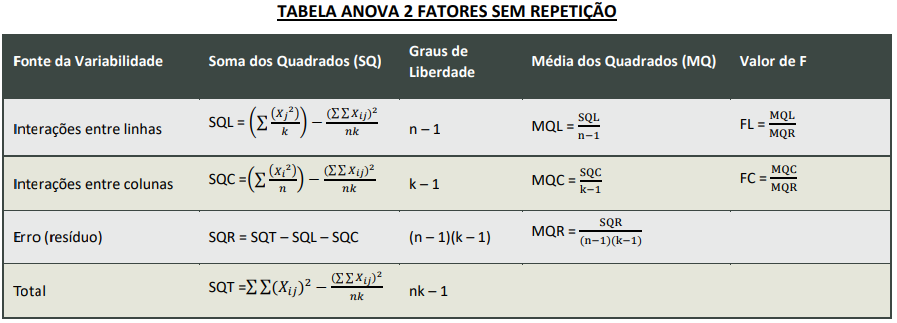

In [ ]:
soma_linhas = np.array([tabela.loc['JogadorA',:].sum(), tabela.loc['JogadorB',:].sum(), tabela.loc['JogadorC',:].sum(), tabela.loc['JogadorD',:].sum(), tabela.loc['JogadorE',:].sum()])
media_linhas = np.array([tabela.loc['JogadorA',:].mean(), tabela.loc['JogadorB',:].mean(), tabela.loc['JogadorC',:].mean(), tabela.loc['JogadorD',:].mean(), tabela.loc['JogadorE',:].mean()])

soma_colunas = np.array([tabela.loc[:,'Chuteira1'].sum(), tabela.loc[:,'Chuteira2'].sum(), tabela.loc[:,'Chuteira3'].sum()])
media_colunas = np.array([tabela.loc[:,'Chuteira1'].mean(), tabela.loc[:,'Chuteira2'].mean(), tabela.loc[:,'Chuteira3'].mean()])



In [ ]:
# Calculo do SQT
# sqt_simples = ((tabela - media_geral) ** 2).sum().sum() esta é a forma mais simples (o duplo sum() é feito para somar nas linhas e nas colunas)
sqt = (tabela ** 2).sum().sum() - ((tabela.sum().sum())**2)/(tabela.shape[0]*tabela.shape[1])
sqt

11011.733333333337

In [ ]:
# Calculo  SQC soma de quadrados das colunas
total_col = 0
for coluna in soma_colunas:
  total_col += (coluna**2)/tabela.shape[0]

print(total_col - ((tabela.sum().sum())**2)/(tabela.shape[0]*tabela.shape[1]))
sqc = total_col - ((tabela.sum().sum())**2)/(tabela.shape[0]*tabela.shape[1])

# Outra forma de calcular o SQC
# sqc = ((tabela.mean(axis=0) - media_geral) ** 2).sum() * tabela.shape[0]


136.93333333334886


In [ ]:
# Calculo do SQL
total_linhas = 0
for linha in soma_linhas:
  total_linhas += (linha**2)/tabela.shape[1]

print(total_linhas - ((tabela.sum().sum())**2)/(tabela.shape[0]*tabela.shape[1]))
sql = total_linhas - ((tabela.sum().sum())**2)/(tabela.shape[0]*tabela.shape[1])
# Outra forma de calcular o SQL
# sql = ((tabela.mean(axis=1) - media_geral) ** 2).sum() * tabela.shape[1]


10191.066666666651


In [ ]:
# Calcular a soma dos quadrados das interações (RESÍDUO - ERROR)
sqr = sqt - sql - sqc
sqr

683.7333333333372

In [ ]:
linhas = tabela.shape[0]
colunas = tabela.shape[1]
# Calculo dos graus de liberdade

# GLI (grau de liberdade das linhas)
gli = linhas -1

# GLC (grau de liberdade das colunas)
glc = colunas -1

# GLR (grau de liberdade Residual)
glr = gli * glc

In [ ]:
# Variancia ou quadrado Médio

# MQL quadrado médio das linhas
mql = sql/gli

# MQC quadrado médio das colunas
mqc = sqc/glc

# MQR quadrado médio Residual
mqr = sqr/glr

In [ ]:
# Calculo das estatisticas F e P
fl = mql/mqr
fc = mqc/mqr

p_value_l = 1 - stats.f.cdf(fl, gli, glr)
p_value_c = 1 - stats.f.cdf(fc, glc, glr)
p_value_c, p_value_l

(0.48181446805890926, 7.420257968659971e-05)

In [ ]:
alpha = 0.05
h0 = 'Reheitamos h0' if p_value_l > alpha or p_value_c > alpha else 'Aceitamos h0'
h0

'Reheitamos h0'

**TESTE A/B**


Em resumo, o teste de hipótese é uma estrutura estatística geral para fazer inferências sobre uma população com base em uma amostra, enquanto o teste A/B é um tipo específico de experimento que usa a metodologia de teste de controle para comparar duas versões de algo e tomar decisões baseadas em dados sobre qual versão é melhor. O teste A/B é um exemplo prático de aplicação de conceitos de teste de hipótese em um contexto específico.

https://www.youtube.com/watch?v=j9pnNCiQz3I&ab_channel=ComunidadeDS

https://www.youtube.com/watch?v=mVud0XTe2vA&ab_channel=ComunidadeDS

In [ ]:
import scipy.stats as stats

# Dados de exemplo para o grupo de controle e grupo de experimento (substitua pelos seus próprios dados)
grupo_controle = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Métrica do grupo de controle
grupo_experimento = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Métrica do grupo de experimento

# Realize um teste t de duas amostras para determinar se há uma diferença significativa entre os grupos
t_stat, p_valor = stats.ttest_ind(grupo_controle, grupo_experimento)

# Compare o valor p com um limiar de significância (por exemplo, 0.05) para tomar uma decisão
limiar_significancia = 0.05
if p_valor < limiar_significancia:
    print("Diferença estatisticamente significativa encontrada entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")


Não há diferença estatisticamente significativa entre os grupos.
